<a href="https://colab.research.google.com/github/sftSalman/tensorflowBasic/blob/main/Facial_Expression_recognition_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
import os 

In [3]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip

--2022-07-28 10:15:46--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 2607:f8b0:4023:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘happy-or-sad.zip’

happy-or-sad.zip    100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2022-07-28 10:15:46 (206 MB/s) - ‘happy-or-sad.zip’ saved [2670333/2670333]



In [4]:
import zipfile

In [7]:
local_zip = '/content/happy-or-sad.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('happy-sad')

In [8]:
train_happy_dir = os.path.join('/content/happy-sad/happy')

In [9]:
train_sad_dir = os.path.join('/content/happy-sad/sad')

In [12]:
train_happy_items = os.listdir(train_happy_dir)
train_sad_items = os.listdir(train_sad_dir)

In [11]:
len(train_happy_items)

40

In [13]:
print(len(train_sad_items))

40


In [20]:
items = []
for item in enumerate(train_happy_items):
  items.append(np.array(item))




In [22]:
from tensorflow.keras.preprocessing.image import load_img

Sample happy image:


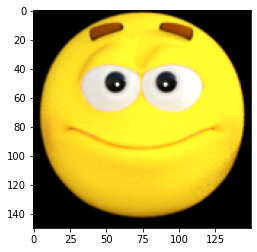


Sample sad image:


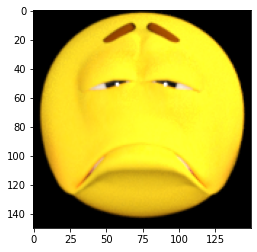

In [29]:
print("Sample happy image:")
plt.imshow(load_img(f"{os.path.join(train_happy_dir, os.listdir(train_happy_dir)[0])}"))
plt.show()

print("\nSample sad image:")
plt.imshow(load_img(f"{os.path.join(train_sad_dir, os.listdir(train_sad_dir)[0])}"))
plt.show()

In [31]:
from tensorflow.keras.preprocessing.image import img_to_array

In [33]:
img = load_img(f"{os.path.join(train_happy_dir, os.listdir(train_happy_dir)[0])}")

In [34]:
img_array = img_to_array(img)

In [35]:
img_array.shape

(150, 150, 3)

In [52]:
class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.979:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True


In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [39]:
train_gen = ImageDataGenerator(rescale=1/255,)

In [44]:
train_generator = train_gen.flow_from_directory('/content/happy-sad',target_size=(150,150),
                                                batch_size =10,
                                                class_mode = 'binary')

Found 80 images belonging to 2 classes.


In [45]:
#using def 
def image_generator():
  train_gen = ImageDataGenerator(rescale=1/255,)

  train_generator = train_gen.flow_from_directory('/content/happy-sad',target_size=(150,150),
                                                batch_size =10,
                                                class_mode = 'binary')
  
  return train_generator


In [69]:
gen=image_generator()

Found 80 images belonging to 2 classes.


In [47]:
    model = tf.keras.models.Sequential([ 
        # First convolution
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        # Second convolution
        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        # Third convolution
        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        # Flatten
        tf.keras.layers.Flatten(),
        # Dense layers
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

In [58]:
model.compile(loss="binary_crossentropy",
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

In [59]:
callbacks = myCallbacks()

In [60]:
history = model.fit(train_generator,
                        epochs=20,
                        callbacks=[callbacks]
                       ) 
    

Epoch 1/20
8/8 [==============================] - 3s 179ms/step - loss: 0.7338 - accuracy: 0.7250
Epoch 2/20
8/8 [==============================] - 1s 175ms/step - loss: 0.2717 - accuracy: 0.9000
Epoch 3/20
8/8 [==============================] - 1s 178ms/step - loss: 0.1352 - accuracy: 0.9500
Epoch 4/20
8/8 [==============================] - 1s 178ms/step - loss: 0.0939 - accuracy: 0.9750
Epoch 5/20
8/8 [==============================] - ETA: 0s - loss: 0.0838 - accuracy: 0.9875
Reached 99.9% accuracy so cancelling training!
8/8 [==============================] - 1s 174ms/step - loss: 0.0838 - accuracy: 0.9875


In [67]:
#using def 
def happy_sad_model(train_generator):
  callbacks = myCallbacks()

  model = tf.keras.models.Sequential([ 
        # First convolution
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        # Second convolution
        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        # Third convolution
        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        # Flatten
        tf.keras.layers.Flatten(),
        # Dense layers
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
      

  model.compile(loss="binary_crossentropy",
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])
      

  history = model.fit(train_generator,
                        epochs=20,
                        callbacks=[callbacks]
                       ) 

  return history

In [70]:
hist = happy_sad_model(gen)

Epoch 1/20
8/8 [==============================] - 2s 177ms/step - loss: 0.7974 - accuracy: 0.6875
Epoch 2/20
8/8 [==============================] - 1s 180ms/step - loss: 0.3074 - accuracy: 0.8750
Epoch 3/20
8/8 [==============================] - 1s 176ms/step - loss: 0.1241 - accuracy: 0.9500
Epoch 4/20
8/8 [==============================] - 1s 177ms/step - loss: 0.1604 - accuracy: 0.9500
Epoch 5/20
8/8 [==============================] - 1s 178ms/step - loss: 0.1269 - accuracy: 0.9250
Epoch 6/20
8/8 [==============================] - 1s 176ms/step - loss: 0.1056 - accuracy: 0.9250
Epoch 7/20
8/8 [==============================] - ETA: 0s - loss: 0.0507 - accuracy: 0.9875
Reached 99.9% accuracy so cancelling training!
8/8 [==============================] - 1s 178ms/step - loss: 0.0507 - accuracy: 0.9875


In [72]:
len(hist.epoch)

7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


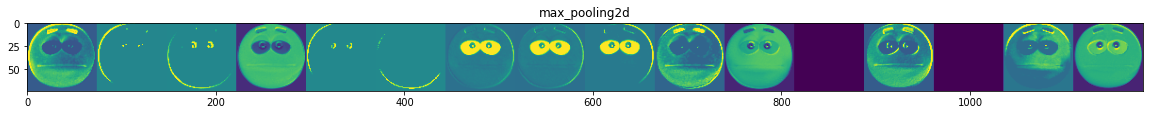

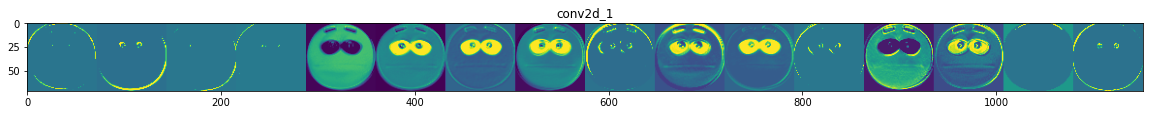

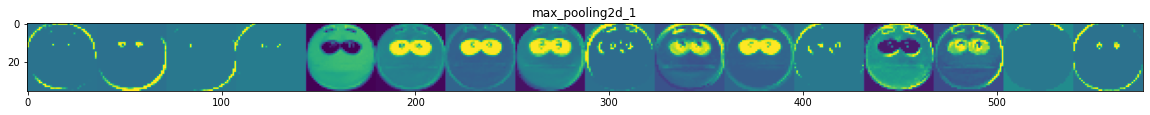

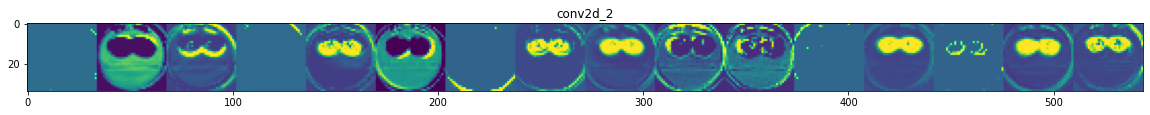

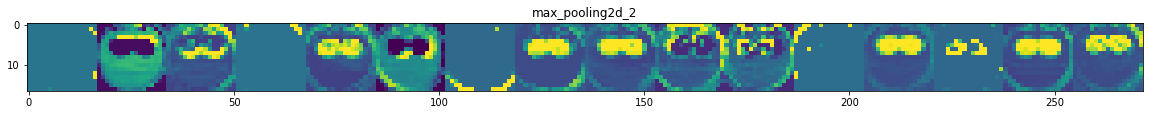

In [75]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
happy_img_files = [os.path.join(train_happy_dir, f) for f in train_happy_items]
sad_img_files = [os.path.join(train_sad_dir, f) for f in train_sad_items]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [79]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + "  this is happy emoji")
  else:
    print(fn + " is a horse")

Saving sad1-00.png to sad1-00.png
[0.9637635]
sad1-00.png  this is happy emoji
